# Error Analysis Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

#Imports
import torch
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertTokenizer

import sklearn
from sklearn.model_selection import train_test_split

## Exploring Top Words From Josh's Model
These are unique tokens from the best performing XLMR model to their category set.

In [2]:
correct_inoffensive = pd.read_csv("data/other/correct_inoffensive.csv")
correct_inoffensive

,Unnamed: 0,0
0,0,እግዚአብሄር
1,1,ህና
2,2,በሰላም
3,3,ሳቸው
4,4,ጥበብ
...,...,...
334,334,፲
335,335,፰
336,336,፻
337,337,፮


In [3]:
false_inoffensive = pd.read_csv("data/other/false_inoffensive.csv")
false_inoffensive

,Unnamed: 0,0
0,0,ኢንተርኔት
1,1,ኪዳን
2,2,ኢየሱስ
3,3,ስምምነት
4,4,ባለሙያ
5,5,ጋምቤላ
6,6,አቀፉ
7,7,ለሰው
8,8,ምርት
9,9,የኢህአዴግ


In [4]:
correct_offensive = pd.read_csv("data/other/correct_offensive.csv")
correct_offensive

,Unnamed: 0,0
0,0,አንተ
1,1,ነህ
2,2,ጭ
3,3,ደደ
4,4,እንዴ
...,...,...
180,180,ምንጮች
181,181,ኴ
182,182,ቖ
183,183,•


In [5]:
false_offensive = pd.read_csv("data/other/false_offensive.csv")
false_offensive

,Unnamed: 0,0
0,0,ምርምር
1,1,!!
2,2,የአማርኛ
3,3,ተቃውሞ
4,4,ፌዴሬሽን
5,5,ደቂቃ
6,6,የፍቅር
7,7,ሊን
8,8,¤
9,9,እድገት


In [6]:
false_offensive['0'][0]

'ምርምር'

Exploring the Training Set

In [7]:
amharic_train = pd.read_csv("data/amharic/amharic_train.csv")
amharic_train

,id,tweet,subtask_a
0,14128,ሙሌ በርታ,OFF
1,28647,ከነሱ በፊት በመጡት ፈላሾች በመገፋታቸዉ አክሱም ላይ ብቻ መወሰናቸው,NOT
2,29559,አቦ ሚኪ ክፉ ቃል እኮ አየወጣሽም,NOT
3,24874,ምን አለ ያኔ ጨርሶ በነበር ሰላማችን የበዛ ይሆን ነበር,NOT
4,10355,የማደንቅሽ መስከረም አበራ ይዶር አብይ አስተዳደር ማለት ይህ ነው ኢትዮጵ...,OFF
...,...,...,...
28995,17144,እዴት ይረሳል ይህ ግዜ ዛሪ ያዙኘ ልቀቁኘ እያለ ዘራፈ ይልብናል አስቴረ ...,OFF
28996,5771,ክትፎ የጉራጌ ነው ግን ለመስቀል ጋሽ በቄም ጃዋርም መብላት ይችላሉ,NOT
28997,26328,ሰይጣን የሰይጣን ቆራጭ በሌብነት ያደግ የድሀ ልጅ,OFF
28998,4604,ድንቅ ነህ,NOT


In [11]:
#printing out full tweets to look at translations online
for i in range(len(amharic_train.tweet)):
    tweet = amharic_train.tweet[i]
    if false_offensive['0'][0] in tweet:
        print(amharic_train.subtask_a[i])
        print(tweet)
        print("\n")

NOT
ይኸ ቀፈታም ዞምቢ ሰው መስሎት ብዙ ሰው ተሸውዶ ነበር ያኔ በሆርን አፌር ሰለመለስ ፅድቅ ሲቀደድ ነበር ዛሬም ከቤተመንግስት እየተከፈለው ከኢንሳ የሚሰጠውን ወሬ እያመላለሰ ከርሱን ይሞላል ጓደኞቹ ስንት ምርምር ያደርጋሉ ዞምቢው ወሬ እያቃጠረ ከርሱን ይሞላል አየህ ቀፈታም ሰው በሆዱ ስትመጣበት አበደ


OFF
እንደው በተሳካላትና ባሳፈረችልን በተለይ እዚው ኮሜንት ላይ የ ብር ካርዱን ሞልቶ ስግጥና አፉን አስፍቶለት እኚን ታላቅ ሰው ምርምር ሊያጣጥል የሚሞክሩ የሀገሪቱ ሸክም ባንዳዎች ማፈራቹ አይቀርም ቀን ጠብቁ


OFF
የናንተ ስራ ነው ኢያ እተስፋፋ ያለው ያኔ  ጎንደር ሚስኪኑ ትግራዋይ በጥይት አናቱ ስትሉት በእሳት ስታቃጥሉት በድንጋይ ስትወግሩት ያሁሉ ጉሙዝ በአን ጉድጓድ ስትቀብሩት በገዛ ወገናቹ ያሁሉ ቅማንት በእሳት ስትለበልቡት የዘር ማጥፋት አዋጅ ሲታወጅበት ለምርምር የወጡ ሙሁራን በድንጋይ ወግራቹ ስትገድሉ ቤተ ክርስትያ የተጠለለ ሚስኪን በእሳት ስታቃጥሉት የሄ ሁሉ ጉድ ተሸክመህ አሁን እደ ደህና ሰው


OFF
በየቴሌቪዥኑበየራዲዮዮውበየጋዜጣው እስከዛሬ የለፈለፉትን ውሸት ያጋለጠ በምርምርና በመረጃ የተገደፈ መፅሀፍ ነው


NOT
ሌላውን ሰፋሪ ይላሉ ነገርግን ኦሮሞዎች አሁን የሰፈሩበትን መሬት ነባሩን ህዝብ እየደመሰሱ በወረራ እንደያዙ ተአማኒነት ያላቸው ጥንታዊ ሰነዶችንየምርምር ውጤቶችን በማስረጃነት ስናቀርብ በአንፃሩ እነሱ አንድም ማስረጃ አለን አይሉምእንዲያውም የራሳቸው የኦሮሞ ምሁራን ኦሮሞ በወረራ እንደተስፋፋ የፃፉትን ማስረጃ አይቀበሉትም


OFF
እግዚአብሄር እረጅም እድሜ ይስጥልን አረ እንኳን ጭንቅላትና ምርምር የሚጠይቀውን የዛሬ ሁለት አመት ኢሬቻ ላይ ማን እንደጨፈጨፋቸው የማያውቁ እንስሶች ናቸው


NOT
ምን ለማድረግ ተፈልጎ ይሆን

## Exploring what tweets got missed

In [12]:
#Model 1: Used BERT pretrained model saved from additional pretraining on newspaper data

bert_save_preds = pd.read_csv("data/other/amharic_dev_predictions.csv")
incorrect_m1 = bert_save_preds[bert_save_preds.label!=bert_save_preds.predicted_label]
incorrect_m1

,Unnamed: 0,id,tweet,subtask_a,label,predicted_label
4,23650,11643,ታላቅ ገብቶናል ትእዛዝህንም እናከብራለን,OFF,1.0,0
6,9687,25485,በትክክል ተገልጿል እርኩስ ነው ለዚች አጭር እድሜ እራሱን የሸጠ ሜት እን...,OFF,1.0,0
7,15975,22796,የኢኽዋን ሴልፊ እደኔ የሰለችው አለ,NOT,0.0,1
12,19338,20442,አብን በደንብ መታገል አለበት የመንግስት እቅድ መጀመሪያ የታጠቀውን ፋኖን...,OFF,1.0,0
15,11100,21080,አንተ አረ ባከህ አፈር ክንፈ ዳኘው አኮ ህዳሰው ግድብን አንኳን አሰርቶ...,NOT,0.0,1
...,...,...,...,...,...,...
2891,15970,7560,ተው እባክህ ለሚያልፍ ጊዜ ሁላችንም ባንተዛዘብ ጥሩ ነው አንተም ይነስም ...,NOT,0.0,1
2893,6049,12798,በማረሚያ እያሉ ስለ እሳቸው የሰማውትና ከዚያ ከወጡ በኋላ ስለ ስብእናቸው...,OFF,1.0,0
2895,2799,11564,ገብረህይወት ጎሹ ዘውዴ ተሰማ በቀጥታ ዝምድና ከተቆጣጠርን ከማንም በላይ ...,OFF,1.0,0
2897,13259,22201,የትነበሩ እስከዛሬ በጣም ዘገያቹህ,OFF,1.0,0


In [13]:
#More tweets are incorrectly marked as not offensive than offensive
incorrect_m1.subtask_a.value_counts()

NOT    578
OFF    447
Name: subtask_a, dtype: int64

In [14]:
bert_save_preds.subtask_a.value_counts()

OFF    1509
NOT    1391
Name: subtask_a, dtype: int64

In [15]:
for t in incorrect_m1[incorrect_m1.subtask_a=="NOT"].tweet:
    print(t)
    print("\n")

የኢኽዋን ሴልፊ እደኔ የሰለችው አለ


አንተ አረ ባከህ አፈር  ክንፈ ዳኘው አኮ ህዳሰው ግድብን አንኳን አሰርቶ ሊጨርስ  አመት አንኳን ቢሰጠው አይጨርሰውም ነበር የመሀይም ጥርቅም ሁላ  አንድ ግድብ ሲሰራ አንኳን ያላየ ሁሉ መሀይም ተሰባስቦ የደሀውን ብር ዘረፋቹ  አታፍርም ደሞ ክንፈ ምናምን ስትል


የኛዎቹ እነ ቀሲስ በላይ ይህን ጥያቄ አያነሱም በሜንጫ አንገቱን ይቆረጣላ


አብይበአመትብዙስራዋችንሲሰራአየነዉሰዉመግደልመሸነፍነዉእንደዚህአላማያለዉመንግስትመደገፍ


ሀብታሙ የመመርመር ስልጣን ሲሰጥህ ትጠይቃለህ ባላወቅከው ጠያቂ መስለህ መርዝ ብትረጭ የሚሰማህ የለም ከኢትዮጵያ አብይ አላባረረህም አታልቅስ ሀገርህ ገብተህ ሰርተ መኖር ትችላለህ እንኳን አንተ ከማል ገልቱጃዋር ሂትለር በነፃነት እየኖሩ ነው ፍርድ አስኪያገኙ አንተም እየሰራህ ላለው የውሽት ዘመቻ ዋጋ ትከፍላለህ ቻይ ህዝብ አለዋቂ አይደለም


አንቺ ትክክለኛዋ ኢትዮጵያዊ መሆንሽ በቃለምልልሱ ላይም አይቻለሁ


ለማንኛውም በአማርኛ አትሰዳደቡ


ነምሰ ገዳይ ከሰይጣን ጋር ሲኦል እንጂ ከፈጣሪ ጋር ገነት አይገባም በጉልበት ልታፀድቁት ነው


አሱ እንደሆነ መልስ አይሰጥህ


በኢንግሊዝኛ የተሰራው ዶክመንታሪ አይቸዋለሁ አንተ ደግሞ እንዳለ ተርጉመህ አቀረብከውና ከዛ ከምኑም የሌሉበት ህወሀቶች በሆነ ተአምር እዛ ውስጥ ለመክተት ብለህ ሰዎች የተጠበቡበት ዘጋቢ ፊልም አበላሸሀው አብየት ውሸት አብየት ውሸት ስዩም ተሾመ


እንግዴ ሁላችን ከጋሞ አባቶችህእኛ ብዝዎችህ መማር ፍቅርን ይቅርታን መማርማስተማር ያለብንክርስቶስ የሞተለን ለአሮሞለአማራለደብብለትግሬ ለአፊር ለነጭ ለጥቁርብቻ አይደለምለሁሉም ነውእና እናተምፖለቲከኛ ነኝ የሰባዊ ተማጎች ነኝ ባዬችህ የፖለቲከኘችምእንግደ ሁላችን ከጋሞ ይቅርታን ማስታረቅን 

<AxesSubplot:>

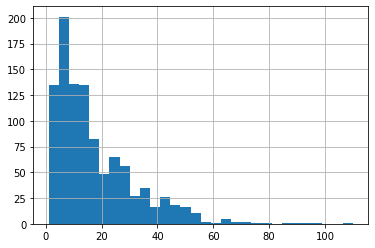

In [16]:
#Explore lengths of incorrect sentences

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in incorrect_m1.tweet]

pd.Series(seq_len).hist(bins = 30)

In [17]:
#37.36% of the missed tweets are less than 10 words long
lengths = np.array(seq_len)
np.sum(lengths < 14)/len(seq_len) 

0.5317073170731708

In [18]:
incorrect_m1['tweet_length'] = lengths
incorrect_m1

<ipython-input-18-03a05dfacf3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incorrect_m1['tweet_length'] = lengths


,Unnamed: 0,id,tweet,subtask_a,label,predicted_label,tweet_length
4,23650,11643,ታላቅ ገብቶናል ትእዛዝህንም እናከብራለን,OFF,1.0,0,4
6,9687,25485,በትክክል ተገልጿል እርኩስ ነው ለዚች አጭር እድሜ እራሱን የሸጠ ሜት እን...,OFF,1.0,0,14
7,15975,22796,የኢኽዋን ሴልፊ እደኔ የሰለችው አለ,NOT,0.0,1,5
12,19338,20442,አብን በደንብ መታገል አለበት የመንግስት እቅድ መጀመሪያ የታጠቀውን ፋኖን...,OFF,1.0,0,37
15,11100,21080,አንተ አረ ባከህ አፈር ክንፈ ዳኘው አኮ ህዳሰው ግድብን አንኳን አሰርቶ...,NOT,0.0,1,36
...,...,...,...,...,...,...,...
2891,15970,7560,ተው እባክህ ለሚያልፍ ጊዜ ሁላችንም ባንተዛዘብ ጥሩ ነው አንተም ይነስም ...,NOT,0.0,1,18
2893,6049,12798,በማረሚያ እያሉ ስለ እሳቸው የሰማውትና ከዚያ ከወጡ በኋላ ስለ ስብእናቸው...,OFF,1.0,0,43
2895,2799,11564,ገብረህይወት ጎሹ ዘውዴ ተሰማ በቀጥታ ዝምድና ከተቆጣጠርን ከማንም በላይ ...,OFF,1.0,0,26
2897,13259,22201,የትነበሩ እስከዛሬ በጣም ዘገያቹህ,OFF,1.0,0,4


In [19]:
incorrect_m1[incorrect_m1.tweet_length < 10]

,Unnamed: 0,id,tweet,subtask_a,label,predicted_label,tweet_length
4,23650,11643,ታላቅ ገብቶናል ትእዛዝህንም እናከብራለን,OFF,1.0,0,4
7,15975,22796,የኢኽዋን ሴልፊ እደኔ የሰለችው አለ,NOT,0.0,1,5
22,13792,18044,አምላክ የበቀል አምላክ ነውና ይበቀላቸው,OFF,1.0,0,5
38,25213,12640,አብይበአመትብዙስራዋችንሲሰራአየነዉሰዉመግደልመሸነፍነዉእንደዚህአላማያለዉመን...,NOT,0.0,1,1
44,17862,3821,ዘቀጥክ ደህና ሰዉ ሲበላስ ቅራሪ የለዉም,OFF,1.0,0,6
...,...,...,...,...,...,...,...
2871,2858,19483,ከምር ዳኒ ሰሞኑንማ የሆነ ንስሀ ገብተሀል ከተለወጡ እንደዚህ ነው,NOT,0.0,1,9
2874,10455,6457,አስቱ እሄ እራስን ማረግ አደለም ይልቅስ ሌላ ብዙ ነገር,OFF,1.0,0,9
2880,16571,29955,ተሎ ተመለስ እባክህ,NOT,0.0,1,3
2887,6666,26501,በተራህ ደም እምባ ታለቅሳለህ በረሀብ ታልቃለህ,NOT,0.0,1,6


In [20]:
#Explore inputs
tokenizer = BertTokenizer.from_pretrained('Davlan/bert-base-multilingual-cased-finetuned-amharic')

In [32]:
max_len = 0
lengths = []
tweets = bert_save_preds.tweet

# For every sentence...
for tweet in tweets:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(tweet, add_special_tokens=True)
    
    
    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))
    lengths.append(len(input_ids))

print('Max tweet length: ', max_len) 

ዘመድኩን ተብየ የሀይማኖት ፅንፍ የተጠናወተህ አስመሰሳይ የእባብ ምላስ የተገጠመልህ እውቀተ ጋኔል ተሸክመህ እስከመቸ ይኸን ህዝብ ማር የተቀባ መርዝ እያጎረስክ ልትቀጥል እንዳሰብክ አምላክ ይወቀው በርግጥ ውሎ ሲያደር እንኳን ያንተ የስንቱ ሴረኛ የዝች ሀገር ቋፍ እየተነቃበት ከሽፎልናል አንተ ግን አለመተከትህ ያስገርመኛል እንጀራ ሆኖብህ ወይስ ነገር ሱስ የቅናት አዙሪት ይሆን ፈጣሪ ይፈውስህ ሌላ ምን ይባላል ትችትም ወግ አለው አዳፍኔነት ግን ሀጢያት ብቻ ሳይሆን ወንጀል ነው ⅱ


ይህ ሰው ለየት የሚለው↪የሚታገልላት አገር እንጂ የሚደበቅበት ብሄር የለውም↪ትክክል ከመባል ይልቅ ትክክል ሆኖ መገኘትን ይመርጣል


እናበኢትትዮብያሁሉምእኩልነውምንአቃተላችሁባገራችንምየቻልነውንማድረግአንችልምዴማንምንከለከላችሁእናንተምበሀይማኖታችሁማድረግያለባችሁካለማድረግነውግንዝምብላችሁየሴታንሀሳብአታስቡነገረኖችሳውዲአረቢያየገባንመሰላችሁእዴደግሞባገራችንአፍችሁንአትክፈቱትአፍችሁንዝጉት


ዱባናቅልስራውእየቅልእኛየምንፎክረውፌስቡክላይወንጀልናግፍእየተፈፀመያለውበተግባርበሚታይምድርላይያሳዝናልያሳፍራልቀጥሎጥቅምትሁለትእኔጃስጋቴትልቅነወእዚህላይየምታቅራሩውሸታሞችፈሪዎችእባካችሁእሳቱንበሰውእጅለመጨበጥአያሳፍርም


Max tweet length:  238


<AxesSubplot:>

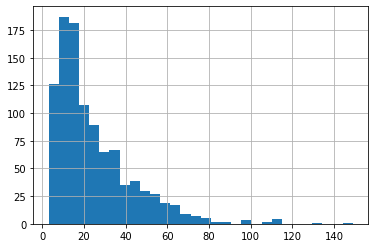

In [22]:
pd.Series(lengths).hist(bins = 30)

In [28]:
tokenizer.encode(false_offensive['0'][3], add_special_tokens=True)

[1, 6283, 2]

## Newspaper EDA

In [41]:
amharic_news = pd.read_csv("data/amharic/Amharic News Dataset.csv")
amharic_news

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012
...,...,...,...,...,...,...
51478,የ2011 በጀት ዓመት የውጭ ዲሎማሲያዊ ተግባራት ስኬታማ እንደነበሩ ተገለጸ,ፖለቲካ,"July 26, 2019",Unknown,በ2011 በጀት ዓመት የተከናወኑ የውጭ ዲፕሎማሲያዊ ተግባራት ስኬታማ እን...,https://waltainfo.com/am/31264/
51479,አቶ አገኘሁ ተሻገር የሰላም ግንባታና የሕዝብ ደህንነት ኃላፊ ሆነው ተሾሙ,ፖለቲካ,"July 25, 2019",Unknown,አቶ አገኘሁ ተሻገር የአማራ ክልል የሰላም ግንባታና የህዝብ ደህንነት ቢሮ...,https://waltainfo.com/am/31259/
51480,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀ,ፖለቲካ,"July 25, 2019",Unknown,የአማራ ክልል ምክር ቤት የ230 ዳኞችን ሹመት አጸደቀየአማራ ክልል ምክር...,https://waltainfo.com/am/31260/
51481,ሃምሌ 22 ለሚካሄደው የችግኝ ተከላ መርሀ-ግብር 54 ሚሊየን ብር ተመድቧል,ሀገር አቀፍ ዜና,"July 25, 2019",Unknown,በዘንድሮ በጀት ዓመት ከ4 ቢሊዮን ችግኝ በላይ ለመትከል እቅድ መያዙ ይታ...,https://waltainfo.com/am/32585/


In [39]:
amharic_news.date.value_counts()

2021-01-04                        869
2021/1/22 20:38 GMT               234
2021/1/22 20:39 GMT               209
2021/1/22 20:41 GMT               168
2021/1/22 20:40 GMT               159
                                 ... 
Saturday, 20 May 2017 13:09         1
August 01, 2014                     1
Saturday, 30 May 2020 11:42         1
Monday, 11 January 2021 00:00       1
April 07, 2017                      1
Name: date, Length: 6189, dtype: int64

In [44]:
#6189 dates
np.unique(amharic_news.date).shape

(6189,)

In [59]:
dates = pd.to_datetime(amharic_news.date, errors='coerce')
dates

0        2021-01-14 00:00:00
1        2020-12-28 00:00:00
2        2021-01-06 00:00:00
3        2021-01-06 00:00:00
4        2021-01-06 00:00:00
                ...         
51478    2019-07-26 00:00:00
51479    2019-07-25 00:00:00
51480    2019-07-25 00:00:00
51481    2019-07-25 00:00:00
51482    2019-07-25 00:00:00
Name: date, Length: 51483, dtype: object

In [65]:
import datetime

dates = dates[dates.apply(lambda x: isinstance(x, datetime.datetime))]

In [69]:
#Years range from 2011 to 2020
dates.apply(lambda x: x.year).value_counts()

2020.0    15729
2019.0    10729
2018.0     6860
2017.0     5145
2016.0     3860
2021.0     3126
2015.0     2888
2014.0     1201
2013.0     1019
2012.0       82
2011.0       26
Name: date, dtype: int64